In [1]:
# Required libraries
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
# Load data assuming CSV files are in the same directory
distribution_centers = pd.read_csv("./data/distribution_centers.csv")
events = pd.read_csv("./data/events.csv")
inventory_items = pd.read_csv("./data/inventory_items.csv")
order_items = pd.read_csv("./data/order_items.csv")
orders = pd.read_csv("./data/orders.csv")
products = pd.read_csv("./data/products.csv")
users = pd.read_csv("./data/users.csv")


## EDA

In [3]:
orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2


In [5]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [18]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [6]:
# Check for missing values in orders df
missing_values_orders = orders.isnull().sum()
print("Missing Values in Orders Dataset:")
print(missing_values_orders)

Missing Values in Orders Dataset:
order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112696
shipped_at       43765
delivered_at     81342
num_of_item          0
dtype: int64


In [7]:
# Check for missing values in order_items df
missing_values_order_items = order_items.isnull().sum()
print("\nMissing Values in Order_Items Dataset:")
print(missing_values_order_items)



Missing Values in Order_Items Dataset:
id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64


### Distribution of Order Status:

In [8]:
import plotly.express as px

# Count occurrences of each order status
status_counts = orders['status'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(values=status_counts.values, names=status_counts.index, title='Distribution of Order Status', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Temporal Analysis

### Trends over time for order creation

In [10]:
# Convert timestamp columns to datetime 
orders['created_at'] = pd.to_datetime(orders['created_at'], format='ISO8601')
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'], format='ISO8601')
orders['delivered_at'] = pd.to_datetime(orders['delivered_at'], format='ISO8601')
orders['returned_at'] = pd.to_datetime(orders['returned_at'], format='ISO8601')


In [11]:
# Extract relevant time 
orders['order_year'] = orders['created_at'].dt.year
orders['order_month'] = orders['created_at'].dt.month
orders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_year,order_month
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaT,NaT,NaT,3,2022,10
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaT,NaT,NaT,1,2023,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaT,NaT,NaT,1,2021,12
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaT,NaT,NaT,1,2020,8
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaT,NaT,NaT,2,2023,1
...,...,...,...,...,...,...,...,...,...,...,...
125221,125196,99972,Shipped,M,2022-06-25 11:56:00+00:00,NaT,2022-06-28 08:24:00+00:00,NaT,1,2022,6
125222,125199,99975,Shipped,M,2022-07-20 02:19:00+00:00,NaT,2022-07-22 11:08:00+00:00,NaT,4,2022,7
125223,125208,99983,Shipped,M,2022-03-14 15:06:00+00:00,NaT,2022-03-17 05:15:00+00:00,NaT,1,2022,3
125224,125210,99983,Shipped,M,2023-03-01 15:06:00+00:00,NaT,2023-03-02 10:50:00+00:00,NaT,2,2023,3


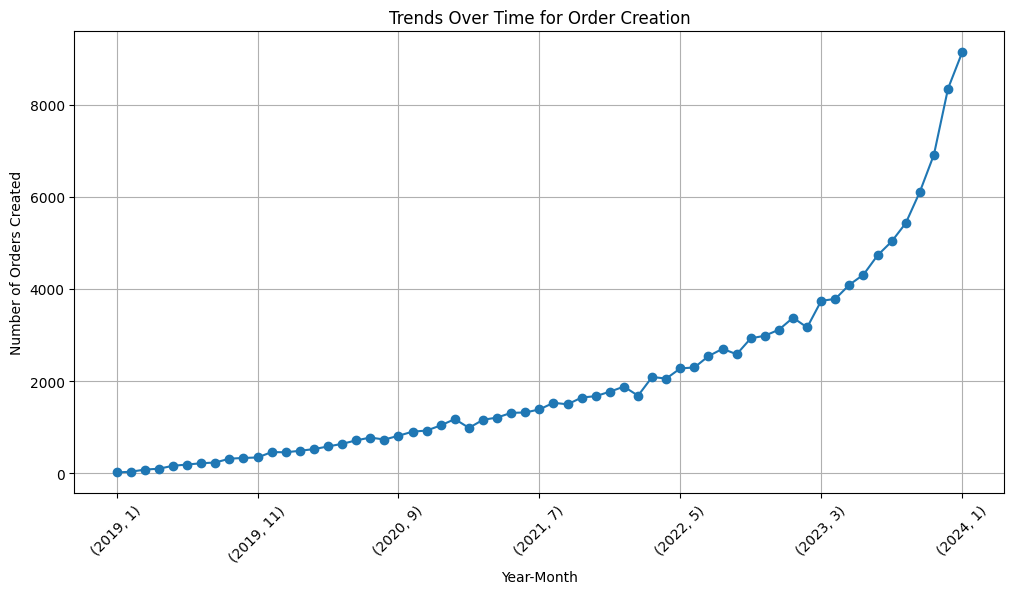

In [12]:
import matplotlib.pyplot as plt

# Plot trends over time for order creation
plt.figure(figsize=(12, 6))
orders.groupby(['order_year', 'order_month']).size().plot(kind='line', marker='o')
plt.title('Trends Over Time for Order Creation')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders Created')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Monthly order volume

In [13]:
# Group by month and year, and count the number of orders
monthly_order_volume = orders.groupby('order_month').size().reset_index(name='order_count')

# Plot monthly order volume using Plotly
fig = px.line(monthly_order_volume, x='order_month', y='order_count', 
              title='Monthly Order Volume', labels={'order_month': 'Month', 'order_count': 'Number of Orders'})
fig.update_xaxes(type='category')  # Ensure proper ordering of months
fig.show()

### Seasonal Order Volume

In [14]:
# Define a function to map month numbers to seasons
def map_season(month_num):
    if month_num in [12, 1, 2]:
        return 'Winter'
    elif month_num in [3, 4, 5]:
        return 'Spring'
    elif month_num in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to map month numbers to seasons
orders['season'] = orders['order_month'].apply(map_season)

# Group by season and count the number of orders
seasonal_order_volume = orders.groupby('season').size().reset_index(name='order_count')

# Plot seasonal order volume using Plotly
fig = px.bar(seasonal_order_volume, x='season', y='order_count', 
             title='Seasonal Order Volume', labels={'season': 'Season', 'order_count': 'Number of Orders'})

fig.show()

### Distribution of Number of Items per Order

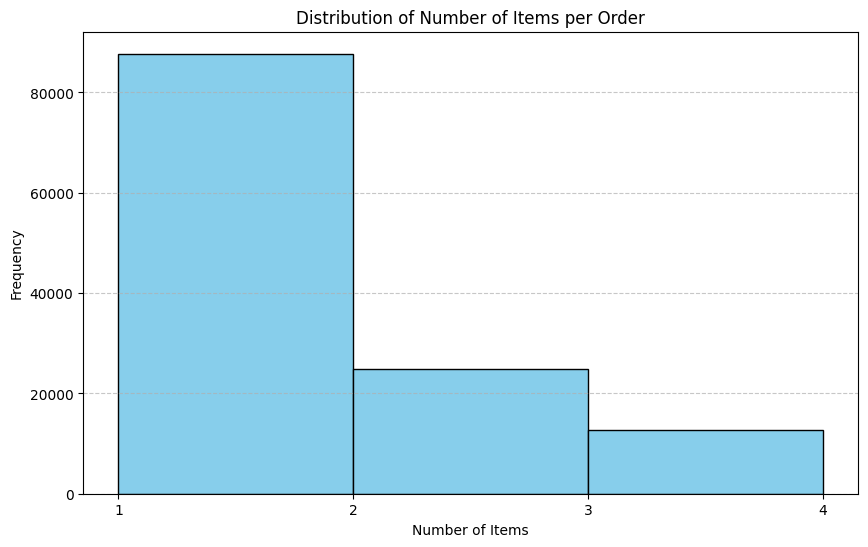

In [15]:
# Plotting the distribution of number of items per order
plt.figure(figsize=(10, 6))
plt.hist(orders['num_of_item'], bins=range(1, orders['num_of_item'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.xticks(range(1, orders['num_of_item'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribution of Sale Price of Items

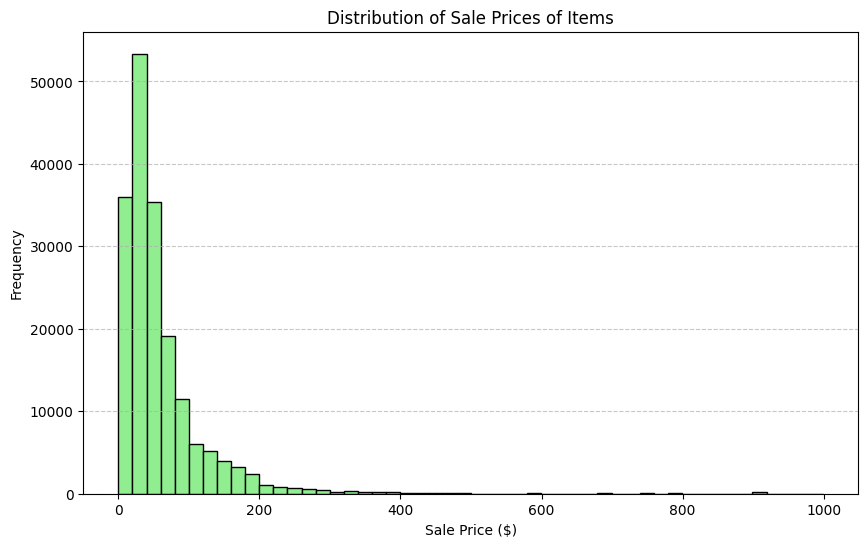

In [16]:
# Plotting the distribution of sale prices of items
plt.figure(figsize=(10, 6))
plt.hist(order_items['sale_price'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sale Prices of Items')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Gender Analysis

> Investigate the gender distribution of customers who placed orders.

In [17]:

import plotly.graph_objects as go

# Count the number of orders for each gender
gender_counts = orders['gender'].value_counts()

# Create a Pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=gender_counts.index, values=gender_counts.values)])

# Update layout
fig.update_layout(title='Gender Distribution of Customers Who Placed Orders')

# Show the plot
fig.show()

In [21]:
# Extract year from 'created_at'
orders['year'] = orders['created_at'].dt.year

# Calculate return rate yearly
return_rates = orders.groupby('year')['returned_at'].apply(lambda x: x.notnull().mean() * 100)

# Create Plotly figure
fig = go.Figure()

# Add trace for return rates
fig.add_trace(go.Scatter(
    x=return_rates.index,
    y=return_rates.values,
    mode='lines+markers',
    marker=dict(color='blue'),
    line=dict(width=2),
    name='Return Rate (%)'
))

# Update layout
fig.update_layout(
    title='Yearly Order Return Rate',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Return Rate (%)'),
    hovermode='x unified'
)

# Show plot
fig.show()

In [26]:
# Calculate processing time
orders['processing_time'] = orders['shipped_at'] - orders['created_at']

# Group by year and calculate average processing time
avg_processing_time_yearly = orders.groupby('year')['processing_time'].mean()

print(avg_processing_time_yearly)

# Create a Plotly figure
fig = go.Figure()

# Add a line trace for average processing time by year
fig.add_trace(go.Scatter(
    x=avg_processing_time_yearly.index,
    y=avg_processing_time_yearly.values,
    mode='lines+markers',
    marker=dict(color='blue'),
    name='Average Processing Time'
))

# Update layout
fig.update_layout(
    title='Average Order Processing Time by Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Processing Time (days)'),
    showlegend=True,
    template='plotly_white'
)

# Show the plot
fig.show()

year
2019   1 days 11:08:43.512544802
2020   1 days 12:23:51.246655965
2021   1 days 11:59:12.488038277
2022   1 days 11:42:05.603407477
2023   1 days 11:57:29.599248591
2024   1 days 12:11:32.941176470
Name: processing_time, dtype: timedelta64[ns]


In [28]:
#Inventory Turnover Analysis
inventory_turnover = inventory_items.groupby('product_name').size().mean()

18.015714495520633

> This value represents the average number of times inventory items have been sold and replenished over a certain period, typically calculated as the number of times inventory is sold divided by the average inventory level.

> an average inventory turnover of approximately 18.0157 means that, on average, each inventory item has been sold and replenished about 18 times during the analyzed period.